This code processes AMT in situ data. We are using files from AMT 18, 19, 20, 22, 24, 25, and 28. The in situ data include: cell concentrations from flow cytometry, high performance liquid chromatography (HPLC) phytoplankton pigment concentrations, POC concentrations, inorganic nutrient concentrations, temperature and salinity.

In [61]:
import csv
import os

import cartopy.crs as ccrs
import earthaccess
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import dask.array as da
from   dask.distributed import Client
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import matplotlib
import matplotlib.colors as colors
from matplotlib import lines
from matplotlib.colors import ListedColormap
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker 
import cartopy.mpl.ticker as cticker
import pandas as pd

Navigate to the right folder and load data.

In [ ]:
os.chdir('../home/jovyan/SJK_PACE_hackweek/phytoSTEW/Team/Sasha/surf_all_data/')

In [65]:
FCM_df = pd.read_csv('AMT_surf_FCM.csv')
HPLC_df = pd.read_csv('AMT_surf_HPLC.csv')
POC_df = pd.read_csv('AMT_surf_POC.csv')
Cphyto_df = pd.read_csv('AMT_surf_Cphyto.csv')
nuts_df = pd.read_csv('AMT_surf_nutrients.csv')
TS_df = pd.read_csv('AMT_surf_TS.csv')

Test that we loaded the correct data by plotting the locations of each variable on a global map. First define lats + lons.

In [66]:
lat_FCM = FCM_df.Lat
lon_FCM = FCM_df.Lon
cruise_FCM = FCM_df.Cruise
lat_HPLC = HPLC_df.Lat
lon_HPLC = HPLC_df.Lon
cruise_HPLC = HPLC_df.Cruise
lat_POC = POC_df.Lat
lon_POC = POC_df.Lon
cruise_POC = POC_df.Cruise
lat_Cphyto = Cphyto_df["Latitude (degrees N)"]
lon_Cphyto = Cphyto_df["Longitude (degrees E)"]
cruise_Cphyto = Cphyto_df.Cruise
lat_nuts = nuts_df.Lat
lon_nuts = nuts_df.Lon
cruise_nuts = nuts_df.Cruise
lat_TS = TS_df["Latitude (degree N)"]
lon_TS = TS_df["Longitude (degree E)"]
cruise_TS = TS_df.Cruise

Now plot the locations of samples for each variable, colored by cruise.

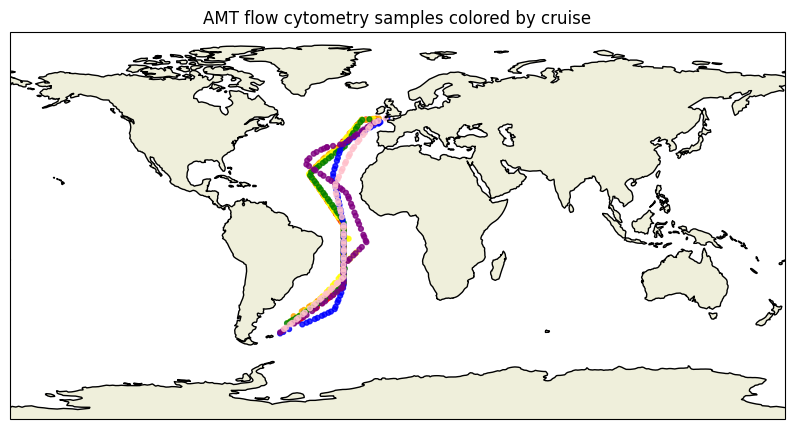

In [67]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAND)
cmap = {'AMT18': 'red', 'AMT19': 'orange', 'AMT20': 'yellow', 'AMT22': 'green', 'AMT24': 'blue', 'AMT25': 'purple', 'AMT28': 'pink'}
colors = cruise_FCM.map(cmap)

scatter = ax.scatter(lon_FCM,lat_FCM,c=colors,s=12, alpha=0.8,
                         transform=ccrs.PlateCarree())
ax.set_global()
ax.set_title('AMT flow cytometry samples colored by cruise')
plt.show()

os.chdir('..')
fig.savefig("AMT_FCM_bycruise" + ".png", format="png", dpi=600)

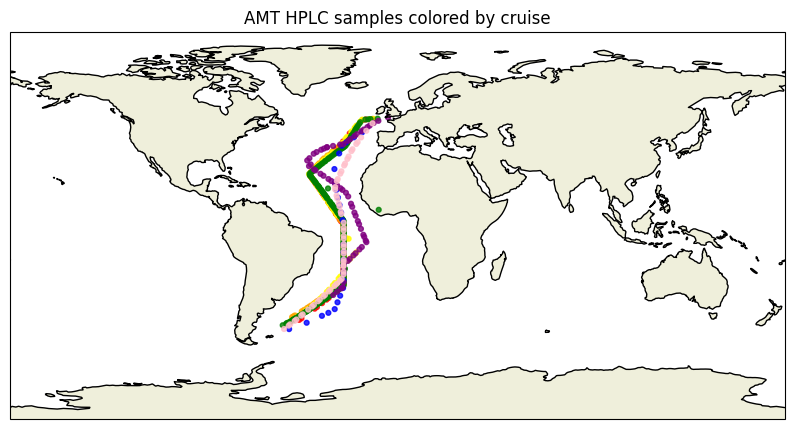

In [68]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAND)
cmap = {'AMT18': 'red', 'AMT19': 'orange', 'AMT20': 'yellow', 'AMT22': 'green', 'AMT24': 'blue', 'AMT25': 'purple', 'AMT28': 'pink'}
colors = cruise_HPLC.map(cmap)

scatter = ax.scatter(lon_HPLC,lat_HPLC,c=colors,s=12, alpha=0.8,
                         transform=ccrs.PlateCarree())
ax.set_global()
ax.set_title('AMT HPLC samples colored by cruise')
plt.show()

fig.savefig("AMT_HPLC_bycruise" + ".png", format="png", dpi=600)

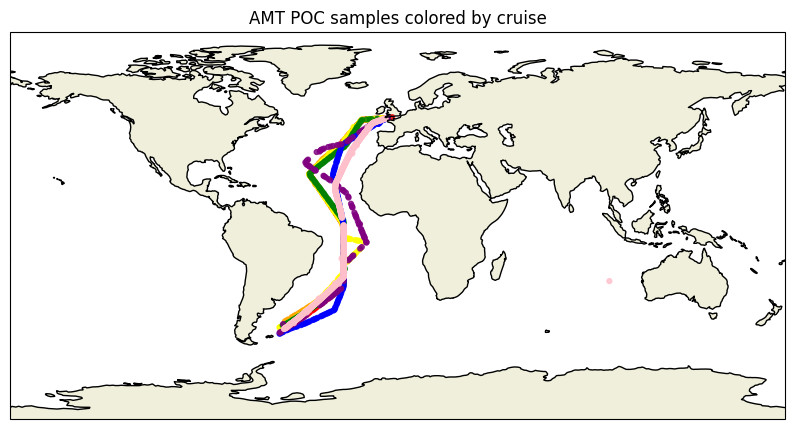

In [69]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAND)
cmap = {'AMT18': 'red', 'AMT19': 'orange', 'AMT20': 'yellow', 'AMT22': 'green', 'AMT24': 'blue', 'AMT25': 'purple', 'AMT28': 'pink'}
colors = cruise_POC.map(cmap)

scatter = ax.scatter(lon_POC,lat_POC,c=colors,s=12, alpha=0.8,
                         transform=ccrs.PlateCarree())
ax.set_global()
ax.set_title('AMT POC samples colored by cruise')
plt.show()

fig.savefig("AMT_POC_bycruise" + ".png", format="png", dpi=600)

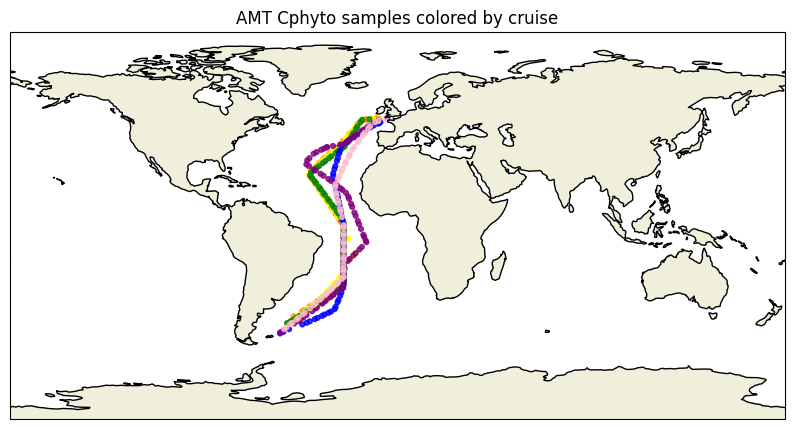

In [70]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAND)
cmap = {'AMT18': 'red', 'AMT19': 'orange', 'AMT20': 'yellow', 'AMT22': 'green', 'AMT24': 'blue', 'AMT25': 'purple', 'AMT28': 'pink'}
colors = cruise_Cphyto.map(cmap)

scatter = ax.scatter(lon_Cphyto,lat_Cphyto,c=colors,s=12, alpha=0.8,
                         transform=ccrs.PlateCarree())
ax.set_global()
ax.set_title('AMT Cphyto samples colored by cruise')
plt.show()

fig.savefig("AMT_Cphyto_bycruise" + ".png", format="png", dpi=600)

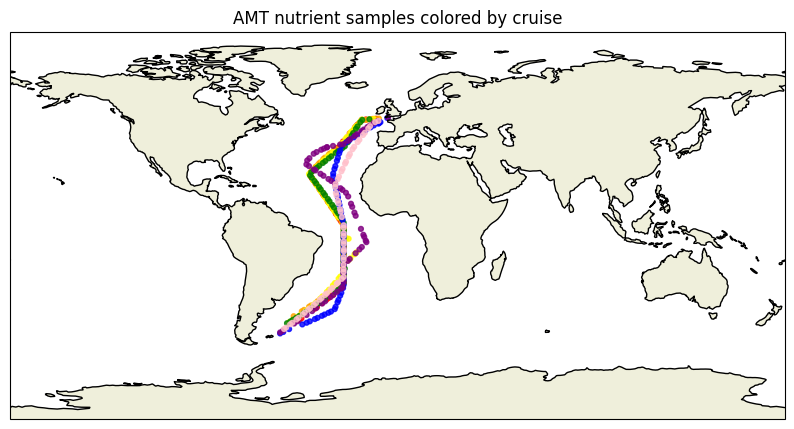

In [71]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAND)
cmap = {'AMT18': 'red', 'AMT19': 'orange', 'AMT20': 'yellow', 'AMT22': 'green', 'AMT24': 'blue', 'AMT25': 'purple', 'AMT28': 'pink'}
colors = cruise_nuts.map(cmap)

scatter = ax.scatter(lon_nuts,lat_nuts,c=colors,s=12, alpha=0.8,
                         transform=ccrs.PlateCarree())
ax.set_global()
ax.set_title('AMT nutrient samples colored by cruise')
plt.show()

fig.savefig("AMT_nuts_bycruise" + ".png", format="png", dpi=600)

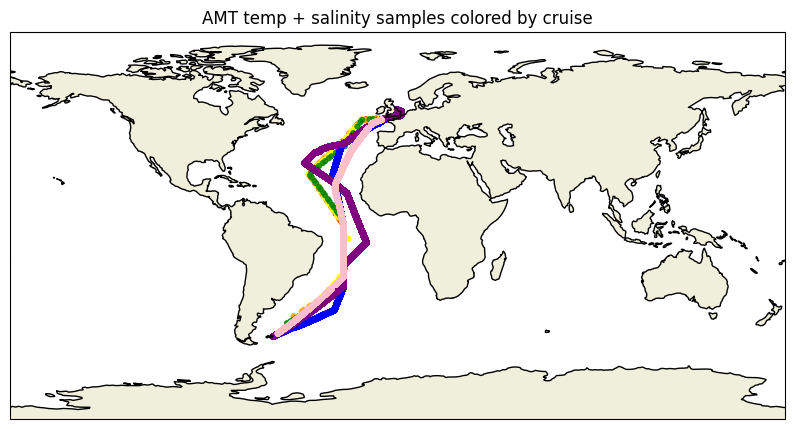

In [72]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAND)
cmap = {'AMT18': 'red', 'AMT19': 'orange', 'AMT20': 'yellow', 'AMT22': 'green', 'AMT24': 'blue', 'AMT25': 'purple', 'AMT28': 'pink'}
colors = cruise_TS.map(cmap)

scatter = ax.scatter(lon_TS,lat_TS,c=colors,s=12, alpha=0.8,
                         transform=ccrs.PlateCarree())
ax.set_global()
ax.set_title('AMT temp + salinity samples colored by cruise')
plt.show()

fig.savefig("AMT_TS_bycruise" + ".png", format="png", dpi=600)